# National tourism promotion Project:
# Data Understanding 

Our analysis rests upon two primary datasets, namely Europe-Top100Attractions_ENG_20190101_20210821 (excel) and Holidays.csv. 
The EuropeTop100Attractions_ENG_20190101_20210821 dataset encom-passes TripAdvisor reviews spanning the period from January 1, 2019, to August 21, 2021, for the top 100 European tourist attractions. It contains 2 different sheets, one with the reviews and other with the 100 Attractions.
The Holidays.csv dataset provides insights into worldwide public holidays. It contains pertinent information, such as countryOrRegion, date, holidayName, and isPaidTimeOff. This dataset enriches our analysis by providing crucial temporal context.


In [1]:
#!pip install prince

In [1]:
# Packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
from math import ceil
from datetime import datetime
import pycountry
import time
from translate import Translator
import langid
import re
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import matplotlib.ticker as mtick
import prince

# 1. Europe-Top100Attractions_ENG_20190101_20210821 Source

## 1.1. Data importation

In [2]:
#dataframe with the first sheet of the europwTop100 excel 
df = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', engine="openpyxl")

In [3]:
df.shape

(92120, 15)

In [4]:
#dataframe with the second sheet of the europwTop100 excel 
Attractions = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name='Attractions')

In [5]:
Attractions.shape

(100, 4)

In [6]:
df.head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi..."
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...


In [7]:
Attractions.head()

,ID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ


## 1.2. Exploratory Data Analysis: Sheet Reviews

### Summary Statistics: Univariate EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

In [9]:
df.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


reviewVisited starts in 2015-10-01, we need to investigate this further

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
globalRating,92120.0,4.485166,0.178085,4.0,4.5,4.5,4.5,5.0
positionOnRanking,92120.0,3.914590,4.843013,1.0,1.0,2.0,6.0,55.0
sitesOnRanking,92120.0,748.263537,802.742304,5.0,154.0,484.0,1186.0,3837.0
totalReviews,92120.0,40556.601813,42914.381014,5179.0,14152.0,24454.0,51324.0,163828.0
userContributions,92120.0,477.520560,7270.518677,0.0,20.0,66.0,215.0,607732.0
reviewRating,92120.0,4.578658,0.792693,1.0,4.0,5.0,5.0,5.0


**From this we can define the Type	Variable	Description**
**Qualitative**
- `localID` - Nominal/Categorical/Factor
- `userName` - Nominal/Categorical/Factor
- `userLocation` - Nominal/Categorical/Factor
- `tripType` - Nominal/Categorical/Factor
- `reviewLanguage` - Nominal/Categorical/Factor
- `reviewFullText` - Nominal/Categorical/Factor
- `reviewRating` - Ordinal/Ranking (Values: 1 to 5)
- `positionOnRanking` - Ordinal/Ranking
- `extractionDate` - Ordinal/Ranking
- `reviewWritten` - Ordinal/Ranking
- `reviewVisited` - Ordinal/Ranking

**Quantitative**
- `sitesOnRanking` - Discrete
- `totalReviews` - Discrete
- `userContributions` - Discrete
- `globalRating` - Continuous (tecnically this is the mean of the total ratings althouh its has only 3 values).

Although presented in numeric form, certain attributes, such as ratings and positions, are descriptive, as they represent ordered categories. Dates are values with an order between them, but
with an unknown magnitude.

In [11]:
df.select_dtypes(include=[np.number]).skew()

globalRating         -0.406169
positionOnRanking     4.096502
sitesOnRanking        1.566002
totalReviews          2.034586
userContributions    72.009683
reviewRating         -2.318242
dtype: float64

In [12]:
df.select_dtypes(include=[np.number]).kurtosis()

globalRating            4.761004
positionOnRanking      28.204280
sitesOnRanking          2.052919
totalReviews            3.255460
userContributions    5855.302513
reviewRating            5.887076
dtype: float64

##### Skewness:
1. **positionOnRanking:**
   - Highly positively skewed.The distribution is heavily skewed towards higher values, indicating few attractions with low rankings and many with high rankings.

2. **userContributions:**
   - Highly positively skewed.The distribution is heavily skewed towards users with a high number of contributions, suggesting that a significant number of users have a relatively low number of contributions, while a few users may have a very high number of contributions. - long tail.

##### Kurtosis:
1. **positionOnRanking:**
   - Extremely leptokurtic. The distribution has extremely heavy tails, indicating a high likelihood of outliers, particularly attractions with highly unusual rankings.

2. **userContributions:**
   - Extremely leptokurtic. The distribution has extremely heavy tails, suggesting a very high likelihood of outliers, particularly users with extremely high contribution counts.

#### Missing Values

In [13]:
missing_data = pd.DataFrame({
    'Total Rows': df.shape[0],
    'Total Non-Null Values': df.count(),
    'Missing Values': df.isnull().sum()
})

missing_data

,Total Rows,Total Non-Null Values,Missing Values
localID,92120,92120,0
extractionDate,92120,92120,0
globalRating,92120,92120,0
positionOnRanking,92120,92120,0
sitesOnRanking,92120,92120,0
totalReviews,92120,92120,0
userName,92120,92100,20
userLocation,92120,78652,13468
userContributions,92120,92120,0
tripType,92120,63052,29068


Our primary goal is to assess the relationship between attractions and reviews. Fortunately, in these columns, we do not have missing values. However, to perform a thorough analysis, we aim to compare reviews before and after the pandemic. While we don't have missing values for the reviewWritten column, there are missing values for reviewVisited. To address this, we'll impute the missing reviewVisited values with their corresponding reviewWritten values, assuming that users can write reviews from the day of their attraction visit (minimum aprox).

Regarding the columns userName, userLocation, and tripType, these variables are under our analysis. Although it's not ideal to have missing values in these columns, we have chosen to leave them as "None specified." This decision allows us to analyze the available values for our primary investigation. Importantly, we want to retain reviews even with missing information in these non-mandatory fields, as they still contribute to our analysis.

#### Data Visualization: Qualitative attributes

In [14]:
sns.set_palette("viridis")


Column: localID
Number of Different Values: 100
Number of Unique Values (appearing only once): 0

Column: userName
Number of Different Values: 65785
Number of Unique Values (appearing only once): 49141

Column: userLocation
Number of Different Values: 12613
Number of Unique Values (appearing only once): 5982

Column: tripType
Number of Different Values: 5
Number of Unique Values (appearing only once): 0


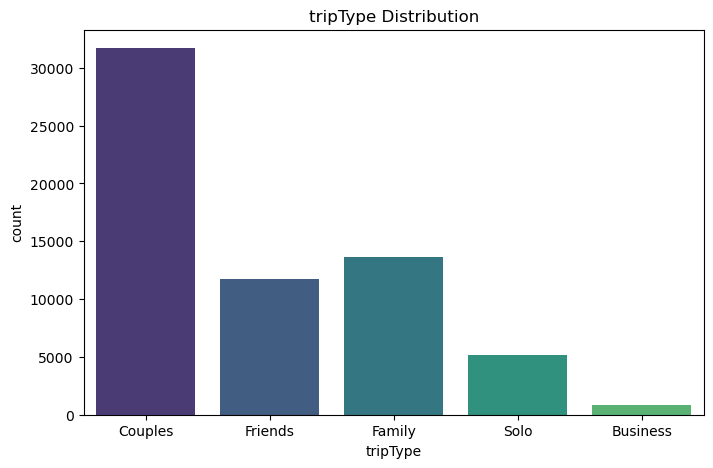


Column: reviewLanguage
Number of Different Values: 1
Number of Unique Values (appearing only once): 0


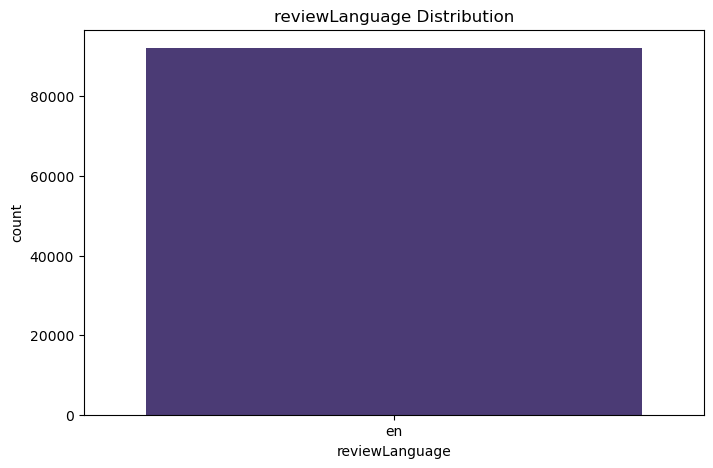


Column: reviewFullText
Number of Different Values: 85088
Number of Unique Values (appearing only once): 78059

Column: globalRating
Number of Different Values: 3
Number of Unique Values (appearing only once): 0


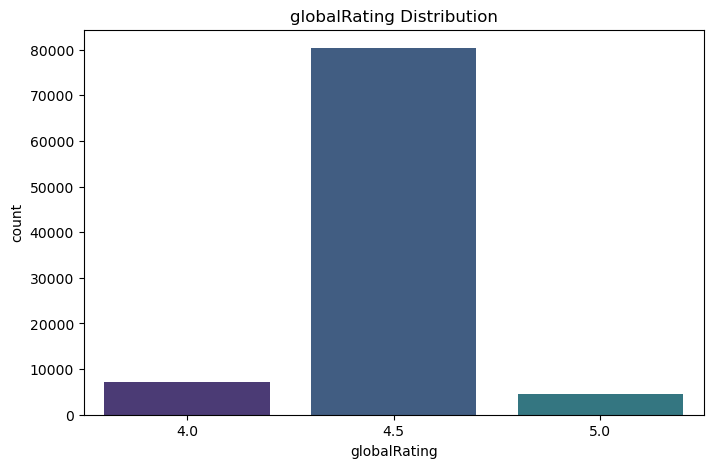


Column: reviewRating
Number of Different Values: 5
Number of Unique Values (appearing only once): 0


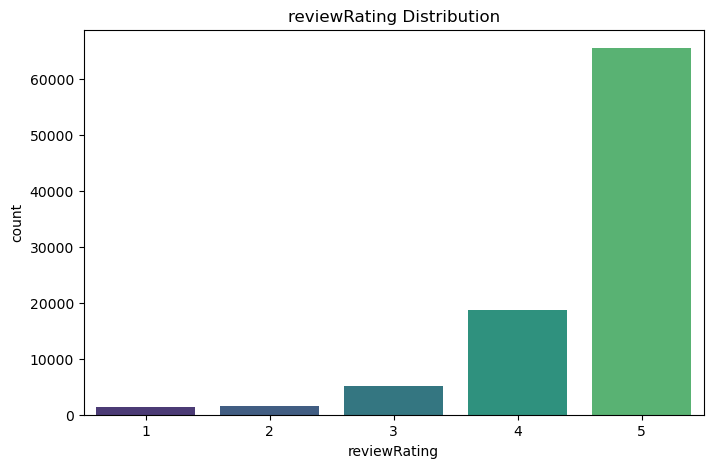


Column: positionOnRanking
Number of Different Values: 17
Number of Unique Values (appearing only once): 0


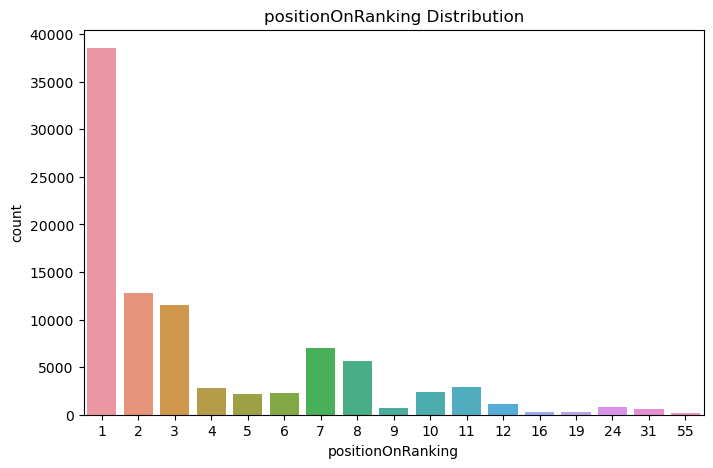


Column: extractionDate
Number of Different Values: 91896
Number of Unique Values (appearing only once): 91672

Column: reviewWritten
Number of Different Values: 934
Number of Unique Values (appearing only once): 26

Column: reviewVisited
Number of Different Values: 57
Number of Unique Values (appearing only once): 7


In [15]:
Qualitative_columns = [
    'localID', 'userName', 'userLocation', 'tripType',
    'reviewLanguage', 'reviewFullText', 'globalRating',
    'reviewRating', 'positionOnRanking', 'extractionDate',
    'reviewWritten', 'reviewVisited'
]

for column in Qualitative_columns:
    unique_values = df[column].value_counts()

    print(f"\nColumn: {column}")
    print(f"Number of Different Values: {len(unique_values)}")
    print(f"Number of Unique Values (appearing only once): {sum(df[column].value_counts() == 1)}")

    if len(unique_values) <= 20:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=column)
        plt.title(f'{column} Distribution')
        plt.show()

`reviewVisited` has less different values 

#### Data Visualization: Discrete variables

In [16]:
def hist_box_maker(df,titl, figx, figy):
    num_of_rows = len(df.columns)
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Iterate across axes objects and associate each histogram:
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        if i%2 == 0:
            ax.hist(df[feat], bins = 50)
            ax.set_title(feat,x=-0.3)
            pltiswork=feat
        else:
            sns.boxplot(x=df[pltiswork], ax = ax)
        i+=1    
    title = titl
    plt.suptitle(title,y=0.90)
    plt.show()

In [17]:
Discrete_features=['sitesOnRanking','totalReviews','userContributions']

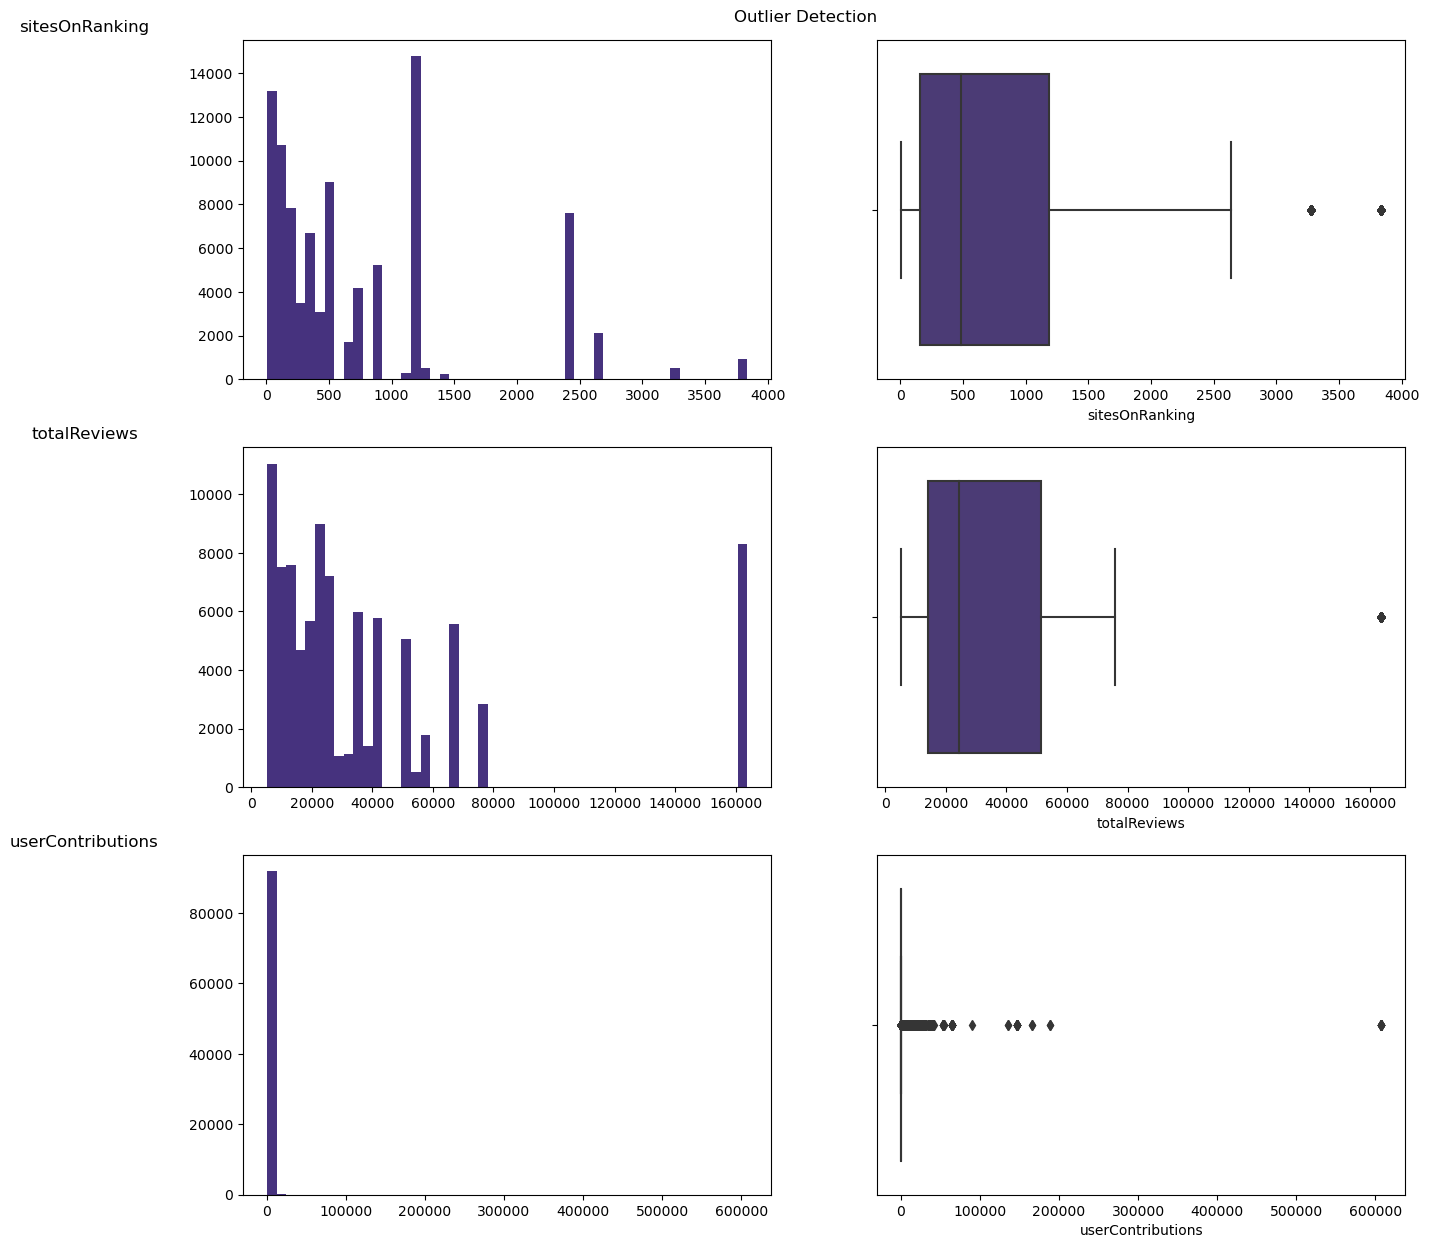

In [18]:
hist_box_maker(df[Discrete_features],"Outlier Detection",15,15)

In [19]:
print(df.loc[df['totalReviews'] > 160000, 'localID'].unique())

['MAG001']


In [1]:
high_contributors = df[df['userContributions'] > 300000]
print(high_contributors['userName'].unique())

NameError: name 'df' is not defined

- `sitesOnRanking`: The total number of attractions in TripAdvisor's regional ranking at the extraction date can change due to the time needed to make the extraction.
Decision: Not critical for analysis, and fluctuations are expected due to extraction time. No need to treat outliers.

- `totalReviews` - Sagrada Familia (MAG001) represents the monument with the most reviews as of the extraction date. This outlier may indicate a significant level of interest or popularity for this particular attraction, suggesting a potential pattern in user engagement. 
Decision: Indicates significant interest or popularity. Valuable for further analysis, and therefore, should be maintained. BUT Despite its significance for further analysis, it's acknowledged that the substantial number of visits to Sagrada Familia might dominate and influence overall trends. To address this outlier, special models will be created when necessary, ensuring a focused examination of this distinct monument's impact.

- `userContributions`: we already discover that this column is Highly positively skewed. Some users have more than 100 000 contributions, which is quite substantial. its difficult to see the distribution in this way. 

Decision: Goal is to understand typical user behavior.We want to see is its possible that a potential bias is introduced by a users who may primarily rate attractions in the US for example. Further investigation may be needed to assess this impact, lets see the case of  'Neil K@293neilk' (user with the most contributions).

In [21]:
len(df[df['userName'] == 'Neil K@293neilk'])

11

In [22]:
df[df['userName'] == 'Neil K@293neilk'].groupby(['localID', 'reviewWritten', 'reviewVisited', 'reviewRating', 'reviewFullText']).size().reset_index(name='count')

,localID,reviewWritten,reviewVisited,reviewRating,reviewFullText,count
0,MAG007,2019-05-29,2019-05-01,5,Although my twin brother Stephen and I never v...,1
1,MAG013,2019-05-18,2019-05-01,5,Grand Place ( Grote Markt ) is the central sq...,1
2,MAG026,2019-12-23,2019-12-01,5,Without a shadow of a doubt the most famous an...,2
3,MAG029,2019-05-28,2019-05-01,5,The Historic Center of Vienna is one of the mo...,1
4,MAG035,2019-11-26,2019-11-01,5,Before starting a week's holiday in Sofia my t...,1
5,MAG035,2020-03-21,2020-03-01,5,The Royal Albert Dock area of Liverpool is suc...,1
6,MAG035,2020-12-13,2020-12-01,5,The Royal Albert Dock is without a shadow of a...,1
7,MAG035,2021-03-20,2021-03-01,5,The pandemic achieved what Oliver Cromwell per...,1
8,MAG054,2019-05-29,2019-05-01,5,We had been to the wonderful Salm Brau were we...,1
9,MAG065,2019-08-11,2019-08-01,5,No holiday to Berlin would be complete without...,1


- The number of contributions by this user for our specific attractions is not unusual (11). We have identified a duplicate entry for MAG026, which needs to be resolved during the duplicates cleaning process. Additionally, the user frequently visits the MAG035 monument on different dates. It could be intriguing to explore the perspective of someone familiar with the attraction before and after the pandemic, aiming to capture changes that might influence shifts in demand. 

- We are going to treat this type of outliers by giving it the MAX value from the ”valid” maximum values - since this is the total reviews from the user (not only to europe attarctions) this is not a significant change and we can still consider this user in the range of frequent contributors useres without having a crazy range.

### Summary Statistics: Bivariate EDA
#### Categorical-Quantitative: 

ANOVA Result:
F_onewayResult(statistic=17.358939290326, pvalue=3.04042753928364e-14)


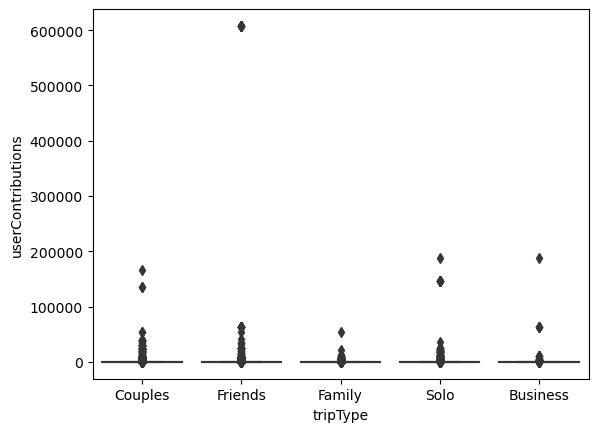

In [23]:
sns.boxplot(x='tripType', y='userContributions', data=df)
anova_result = f_oneway(*[group['userContributions'] for name, group in df.groupby('tripType')])

print("ANOVA Result:")
print(anova_result)

<Figure size 1500x600 with 0 Axes>

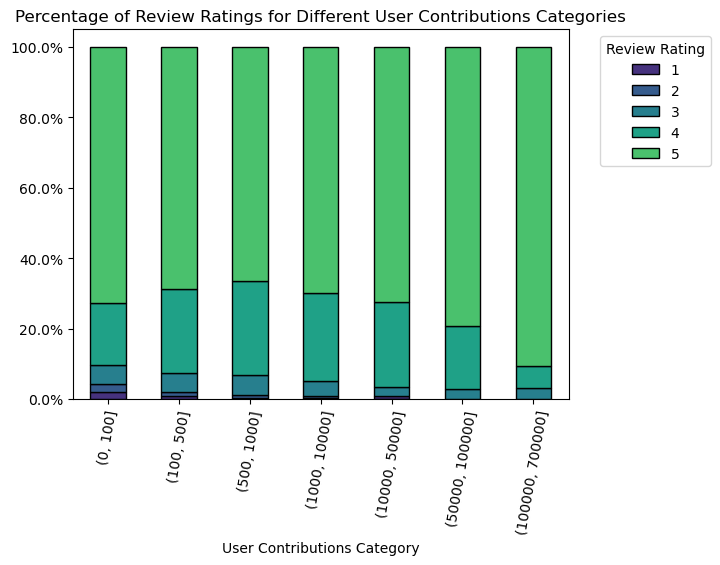

In [24]:
df['userContributionsCategory'] = pd.cut(df['userContributions'], bins=[0, 100, 250, 500, 1000, 10000, 50000, 700000])

rating_counts = df.groupby(['userContributionsCategory', 'reviewRating']).size().unstack()

# Normalizing to get percentages
rating_percentages = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 6))
ax = rating_percentages.plot(kind='bar', stacked=True, edgecolor='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title('Percentage of Review Ratings for Different User Contributions Categories')
plt.xlabel('User Contributions Category')
plt.xticks(rotation=80)
plt.legend(title='Review Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

An interesting pattern emerges in the distribution of review ratings based on user contributions. A higher percentage of worse ratings is observed in the range where users make fewer reviews.

Possible Explanations:

- **Sampling Bias:**
   - Users with fewer reviews may have had more extreme experiences, leading to a higher likelihood of giving extreme ratings (potentially influencing them to be more critical or less forgiving).
   - Users with more contributions might have a more balanced view due to a larger sample size.

#### Categorical-Categorical: 

In [25]:
observed_data = pd.crosstab(df['tripType'], df['reviewRating'])
chi2, p, _, _ = chi2_contingency(observed_data)

print(f"Chi-square Value: {chi2}")
print(f"P-value: {p}")

Chi-square Value: 82.25925262704209
P-value: 6.499333604430781e-11


##### Analysis of Association between `tripType` and `reviewRating`

We conducted a Chi-square Test of Independence to assess the relationship between the variables `tripType` and `reviewRating`. The results indicate a significant association between these two categorical variables.
The small p-value suggests that we reject the null hypothesis, indicating a relationship between `tripType` and `reviewRating`. However, the test alone does not provide information about the strength or nature of this association:

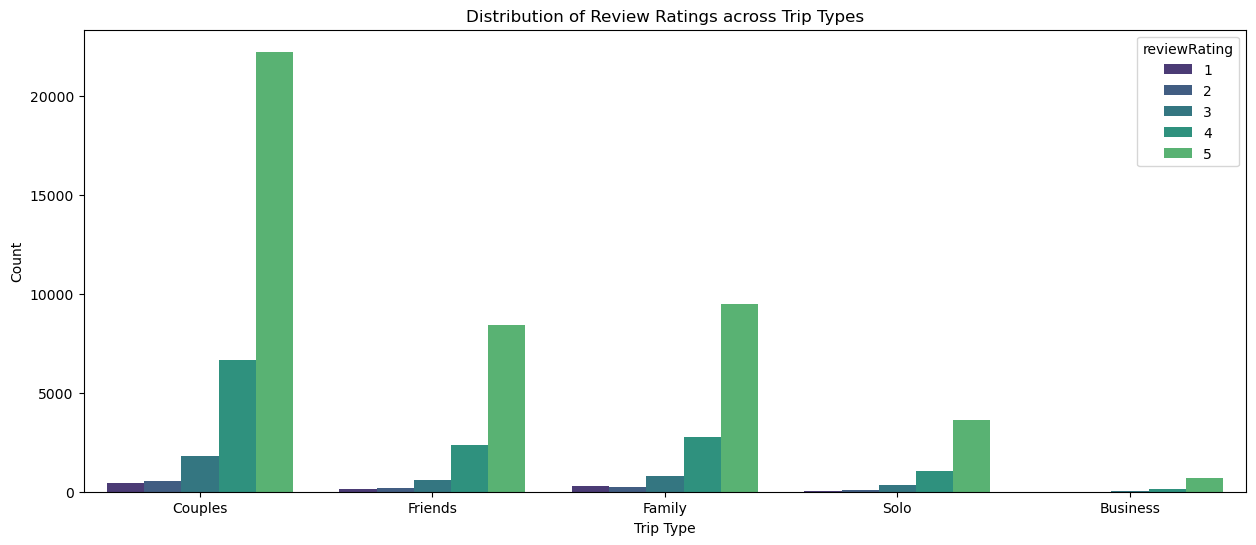

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='tripType', hue='reviewRating')
plt.title('Distribution of Review Ratings across Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

We can observe that the most common trip type specified in reviews is 'Couples', accounting for the highest percentage of reviews. The distribution of review ratings is generally consistent across different trip types. However, a notable observation emerges in the 'Family' trip type, where the number of '1' ratings exceeds the number of '2' ratings, creating a deviation from the overall pattern. This could suggest a unique trend within the 'Family' category, possibly indicating that parents, as reviewers, might be more discerning or tend to express extreme opinions. While this deviation is interesting, it doesn't appear to be significantly pronounced across other trip types.

- LocalID and tripType:

In [27]:
localID_trip_counts = df.groupby(['localID', 'tripType']).size().reset_index(name='tripCount')

# localID with the most trips for each trip type
most_trips_by_trip_type = localID_trip_counts.groupby('tripType').apply(lambda x: x.loc[x['tripCount'].idxmax()])

for trip_type, row in most_trips_by_trip_type.iterrows():
    print(f"LocalID with the most trips for {trip_type} trips: {row['localID']}")

LocalID with the most trips for Business trips: MAG001
LocalID with the most trips for Couples trips: MAG001
LocalID with the most trips for Family trips: MAG003
LocalID with the most trips for Friends trips: MAG001
LocalID with the most trips for Solo trips: MAG001


As we expected the MAG001 can monopolize the situation, we are going to normalize (by converting to %) to see this correlation: 

LocalID with the highest percentage for Business trips: MAG094
LocalID with the highest percentage for Couples trips: MAG077
LocalID with the highest percentage for Family trips: MAG060
LocalID with the highest percentage for Friends trips: MAG028
LocalID with the highest percentage for Solo trips: MAG097


<Figure size 1500x600 with 0 Axes>

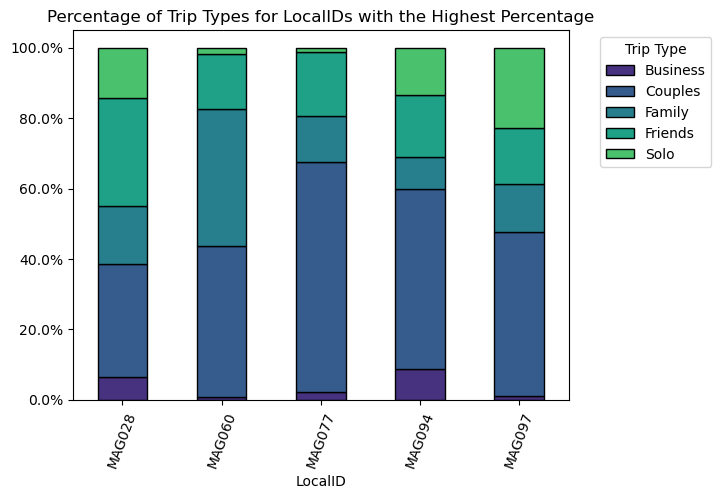

In [28]:
# total trips for each localID with a specified trip type
localID_trip_counts = df.groupby(['localID', 'tripType']).size().reset_index(name='tripCount')

# total trips for each localID
localID_total_trips = localID_trip_counts.groupby('localID')['tripCount'].sum().reset_index(name='totalTrips')

# percentage of each trip type for each localID
localID_percentages = pd.merge(localID_trip_counts, localID_total_trips, on='localID')
localID_percentages['percentage'] = (localID_percentages['tripCount'] / localID_percentages['totalTrips']) * 100

# localID with the highest percentage for each trip type
most_percentage_by_trip_type = localID_percentages.loc[localID_percentages.groupby('tripType')['percentage'].idxmax()]

for _, row in most_percentage_by_trip_type.iterrows():
    print(f"LocalID with the highest percentage for {row['tripType']} trips: {row['localID']}")

selected_localIDs = most_percentage_by_trip_type['localID'].unique()
localID_percentages_selected = localID_percentages[localID_percentages['localID'].isin(selected_localIDs)]
localID_percentages_pivot = localID_percentages_selected.pivot(index='localID', columns='tripType', values='percentage')
plt.figure(figsize=(15, 6))
ax = localID_percentages_pivot.plot(kind='bar', stacked=True, edgecolor='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))  
plt.title('Percentage of Trip Types for LocalIDs with the Highest Percentage')
plt.xlabel('LocalID')
plt.xticks(rotation=70)
plt.legend(title='Trip Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
# Total trips for each localID and reviewRating
localID_trip_counts = df.groupby(['localID', 'reviewRating']).size().reset_index(name='tripCount')

# LocalID with the most trips for each reviewRating
most_trips_by_review_rating = localID_trip_counts.groupby('reviewRating').apply(lambda x: x.loc[x['tripCount'].idxmax()])

for review_rating, row in most_trips_by_review_rating.iterrows():
    print(f"LocalID with the most trips for Review Rating {review_rating}: {row['localID']}")

LocalID with the most trips for Review Rating 1: MAG075
LocalID with the most trips for Review Rating 2: MAG002
LocalID with the most trips for Review Rating 3: u
LocalID with the most trips for Review Rating 4: u
LocalID with the most trips for Review Rating 5: MAG001


We can see a problem with the localID name that needs to be resolve during the Data Preparation (u is not in the right format)

In [30]:
invalid_localIDs = (df[~df['localID'].apply(lambda x: bool(re.match(r'^MAG\d{3}$', str(x))))]
                      ['localID']
                      .value_counts()
                      .reset_index()
                      .rename(columns={'index': 'localID', 'localID': 'Count'}))

print(invalid_localIDs)

  localID  Count
0       u   5060
1   genis    500


LocalID with the highest percentage for Review Rating 1: MAG075
LocalID with the highest percentage for Review Rating 2: MAG075
LocalID with the highest percentage for Review Rating 3: MAG002
LocalID with the highest percentage for Review Rating 4: MAG097
LocalID with the highest percentage for Review Rating 5: MAG038


<Figure size 1500x600 with 0 Axes>

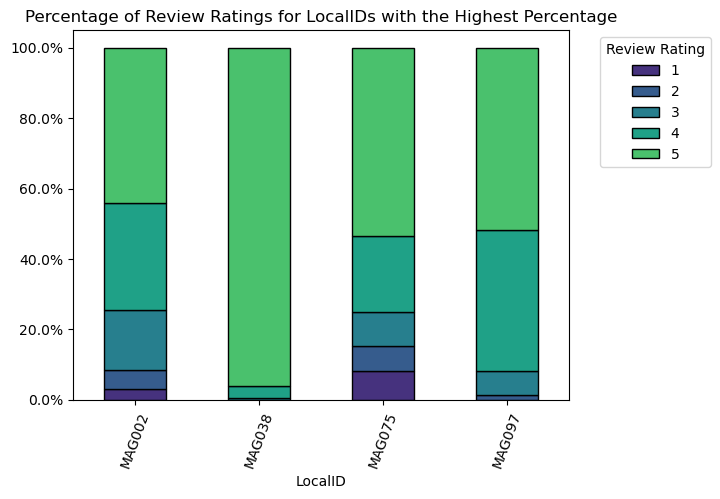

In [31]:
# LocalID total trips for each reviewRating
localID_total_trips = localID_trip_counts.groupby('localID')['tripCount'].sum().reset_index(name='totalTrips')

# percentage of each reviewRating for each localID
localID_percentages = pd.merge(localID_trip_counts, localID_total_trips, on='localID')
localID_percentages['percentage'] = (localID_percentages['tripCount'] / localID_percentages['totalTrips']) * 100

# LocalID with the highest percentage for each reviewRating
most_percentage_by_review_rating = localID_percentages.loc[localID_percentages.groupby('reviewRating')['percentage'].idxmax()]
for _, row in most_percentage_by_review_rating.iterrows():
    print(f"LocalID with the highest percentage for Review Rating {row['reviewRating']}: {row['localID']}")

# selected LocalIDs plot
selected_localIDs = most_percentage_by_review_rating['localID'].unique()
localID_percentages_selected = localID_percentages[localID_percentages['localID'].isin(selected_localIDs)]
localID_percentages_pivot = localID_percentages_selected.pivot(index='localID', columns='reviewRating', values='percentage')
plt.figure(figsize=(15, 6))
ax = localID_percentages_pivot.plot(kind='bar', stacked=True, edgecolor='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))  
plt.title('Percentage of Review Ratings for LocalIDs with the Highest Percentage')
plt.xlabel('LocalID')
plt.xticks(rotation=70)
plt.legend(title='Review Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

MAG075 has the biggest % of negative reviews in th total trips, even in the total is the one with the most '1' reviews. 

<Figure size 1500x600 with 0 Axes>

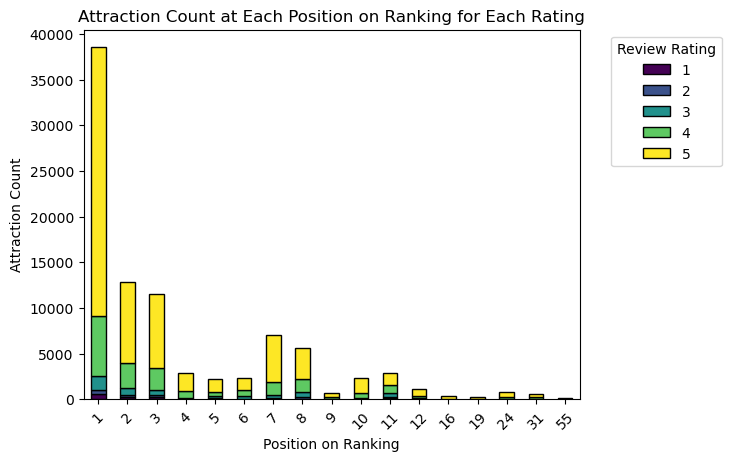

In [32]:
position_rating_counts = df.groupby(['positionOnRanking', 'reviewRating']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 6))
position_rating_counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='k')
plt.title('Attraction Count at Each Position on Ranking for Each Rating')
plt.xlabel('Position on Ranking')
plt.ylabel('Attraction Count')
plt.xticks(rotation=45)
plt.legend(title='Review Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1500x600 with 0 Axes>

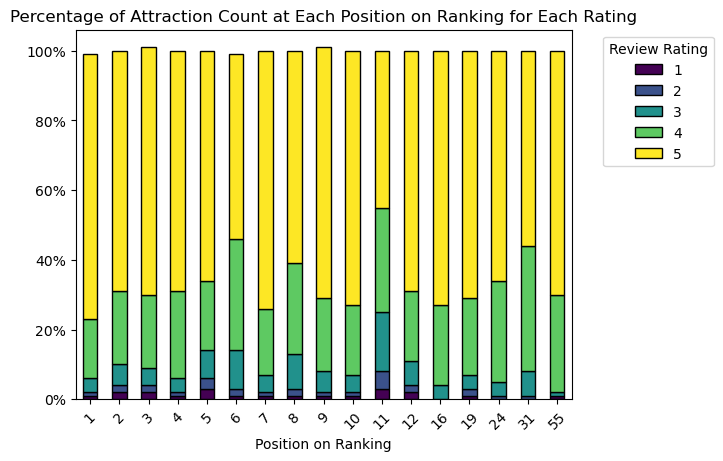

In [33]:
position_rating_counts = df.groupby(['positionOnRanking', 'reviewRating']).size().unstack(fill_value=0)
position_rating_percentages = (position_rating_counts.div(position_rating_counts.sum(axis=1), axis=0) * 100).round(0)

plt.figure(figsize=(15, 6))
position_rating_percentages.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='k')

plt.title('Percentage of Attraction Count at Each Position on Ranking for Each Rating')
plt.xlabel('Position on Ranking')
plt.xticks(rotation=45)
plt.legend(title='Review Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{int(x)}%')
plt.show()

#### Quantitative-Quantitative: Scatter Plot and Correlation

Pearson Correlation Coefficient: -0.018766540602506782


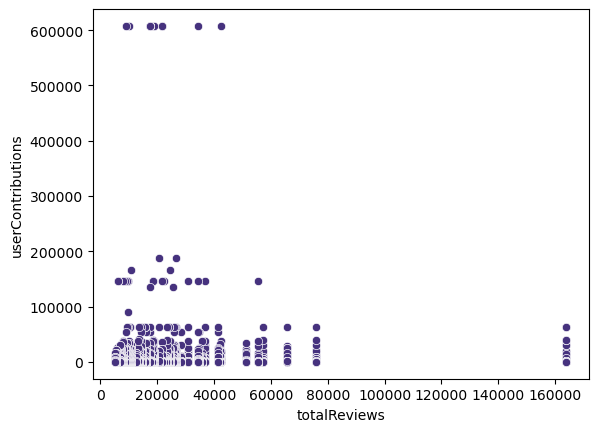

In [34]:
sns.scatterplot(x='totalReviews', y='userContributions', data=df)
correlation = df[['totalReviews', 'userContributions']].corr().iloc[0, 1]

print(f"Pearson Correlation Coefficient: {correlation}")

very weak negative linear relationship between the two variables being correlated. 

#### Time Series Analysis: Line Plot

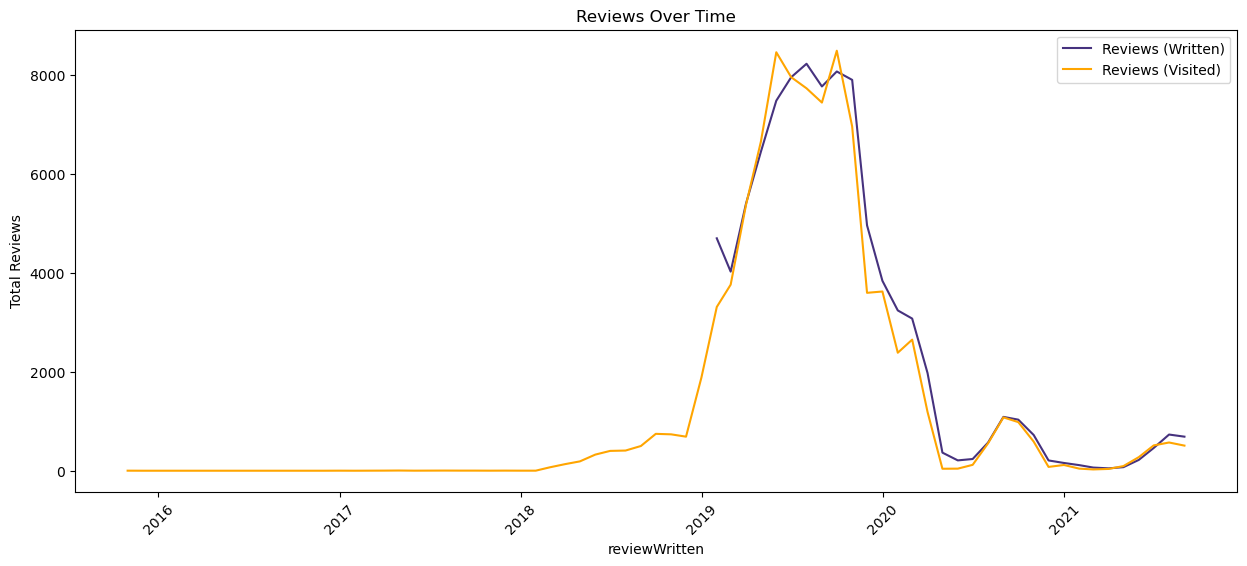

In [59]:
df['reviewWritten'] = pd.to_datetime(df['reviewWritten'])
df['reviewVisited'] = pd.to_datetime(df['reviewVisited'])
monthly_avg_written = df.resample('M', on='reviewWritten')['reviewWritten'].count()
monthly_avg_visited = df.resample('M', on='reviewVisited')['reviewVisited'].count()

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_avg_written.index, y=monthly_avg_written, label='Reviews (Written)')
sns.lineplot(x=monthly_avg_visited.index, y=monthly_avg_visited, label='Reviews (Visited)', color='orange')
plt.title('Reviews Over Time')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.show()

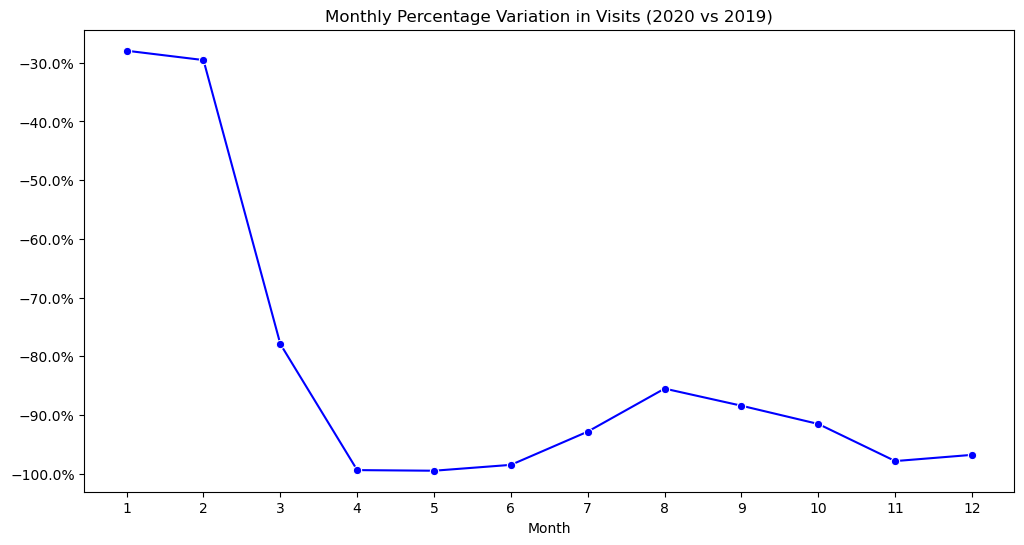

In [36]:
df['reviewWritten'] = pd.to_datetime(df['reviewWritten'])
df['reviewVisited'] = pd.to_datetime(df['reviewVisited'])
df['year'] = df['reviewVisited'].dt.year
df['month'] = df['reviewVisited'].dt.month
df_2019_2020 = df[df['year'].isin([2019, 2020])]

# number of reviews for each month and year
monthly_counts = df_2019_2020.groupby(['year', 'month']).size().unstack()

# percentage variation between 2019 and 2020
monthly_variation = (monthly_counts.loc[2020, :].astype(float) - monthly_counts.loc[2019, :].astype(float)) / monthly_counts.loc[2019, :].astype(float) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_variation.index, y=monthly_variation.values, marker='o', color='blue')
plt.xticks(monthly_variation.index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title('Monthly Percentage Variation in Visits (2020 vs 2019)')
plt.xlabel('Month')
plt.show()

COVID-19 effect:
- In our preliminary analysis comparing visit variations between 2019 and 2020, the profound impact of the COVID-19 pandemic on attraction visits is evident. As COVID-19 cases began surfacing in Europe early in 2020, countries swiftly implemented border closures in March 2020. This visual representation illustrates a sharp decline in visits during this period. With the onset of the summer of 2020, borders cautiously reopened, leading to a modest improvement in visitation, a phenomenon aptly termed the "Rush to Reopen". However, as the second wave of COVID-19 cases surged in many European countries in mid-August, the growth rate escalated rapidly, resulting in a noticeable decrease in attraction visits during that timeframe. This analysis provides insights into the dynamic relationship between the pandemic's progression and its impact on attraction visitation patterns.

### Summary Statistics: Multivariate EDA
#### Redundancy: Duplicate rows

In this analysis, we are excluding the `extractionDate` column from consideration. The exclusion is necessary as the extraction date and time uniquely identify each data entry, making it challenging to identify real duplicate rows. Also, since this extraction takes some time, it's plausible that some edited reviews may appear as duplicates in the dataset.

In [37]:
df.duplicated().sum()

0

In [38]:
duplicates_excluding_column = df[df.duplicated(subset=df.columns.difference(['extractionDate']))]
duplicates_excluding_column.shape[0]

7012

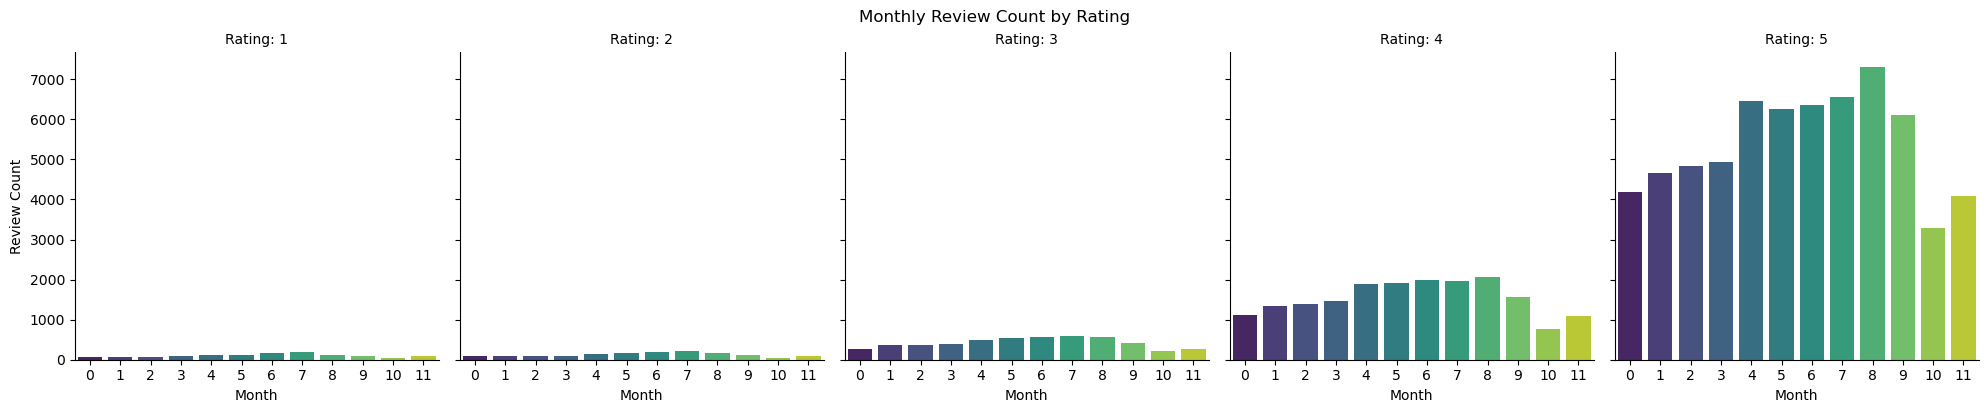

In [39]:
df['reviewVisited'] = pd.to_datetime(df['reviewVisited'])
df['MonthreviewVisited'] = df['reviewVisited'].dt.month

g = sns.catplot(data=df, x="MonthreviewVisited", col="reviewRating", kind="count", col_wrap=5, height=4, palette='viridis')
g.set_axis_labels("Month", "Review Count")
g.set_titles("Rating: {col_name}")
g.fig.suptitle('Monthly Review Count by Rating', y=1.02)

for ax in g.axes.flat:
    labels = [int(label) for label in ax.get_xticks()]
    ax.set_xticklabels(labels)

plt.show()

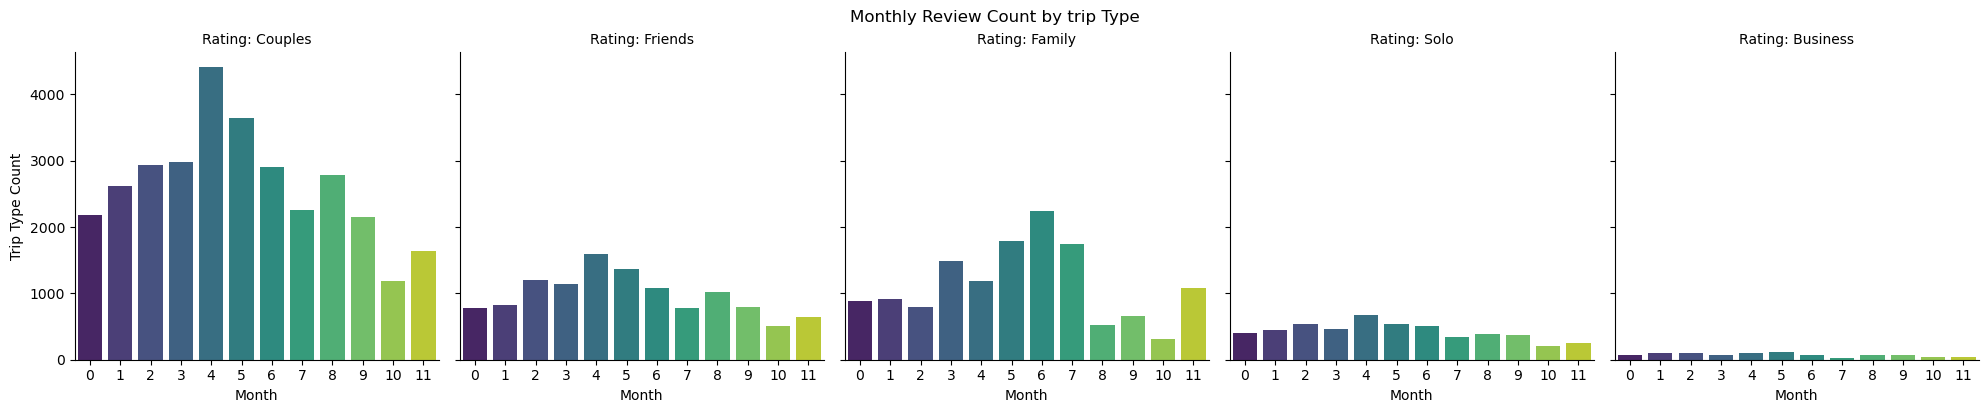

In [40]:
g = sns.catplot(data=df, x="MonthreviewVisited", col="tripType", kind="count", col_wrap=5, height=4, palette='viridis')
g.set_axis_labels("Month", "Trip Type Count")
g.set_titles("Rating: {col_name}")
g.fig.suptitle('Monthly Review Count by trip Type', y=1.02)

for ax in g.axes.flat:
    labels = [int(label) for label in ax.get_xticks()]
    ax.set_xticklabels(labels)

plt.show()

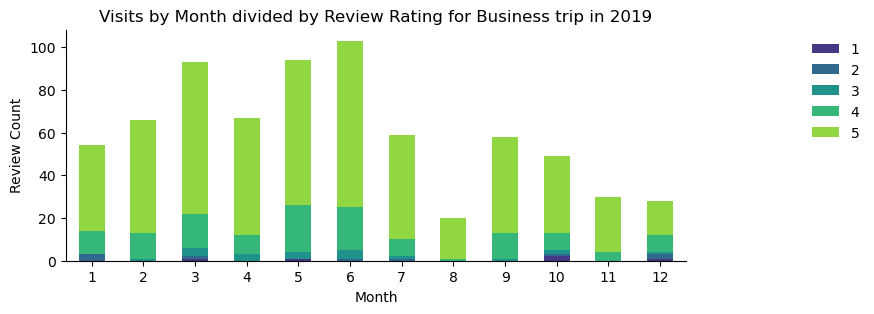

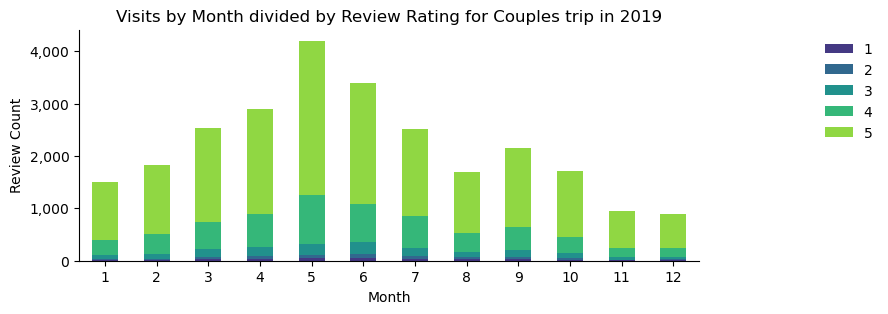

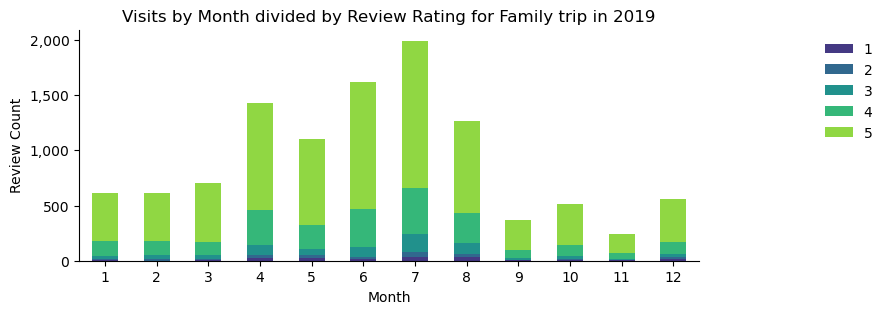

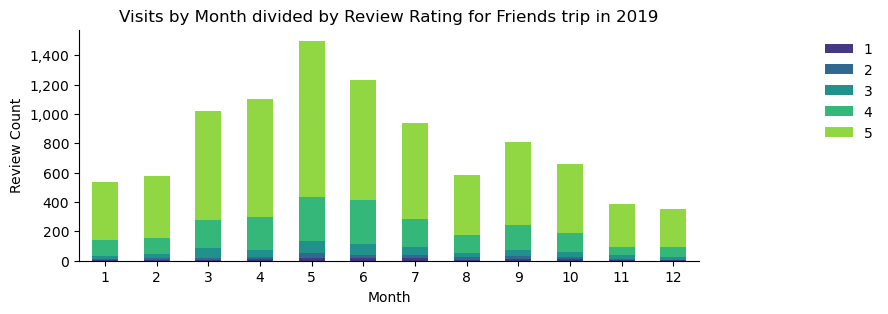

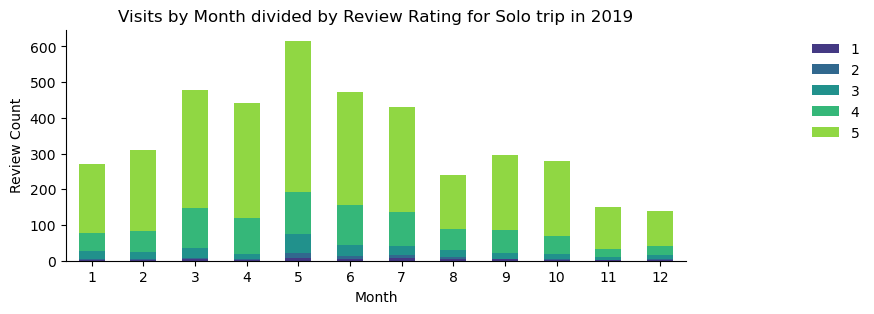

In [41]:
df['reviewVisited'] = pd.to_datetime(df['reviewVisited'])
df_2019 = df[df['reviewVisited'].dt.year == 2019]

# bar plot for each trip type
for trip_type, trip_type_data in df_2019.groupby('tripType'):
    tempDF = trip_type_data.groupby([trip_type_data['reviewVisited'].dt.month.rename('Month'), 'reviewRating']).size().unstack(fill_value=0)

    fig, ax = plt.subplots(figsize=(8, 3))
    custom_palette = sns.color_palette("viridis", n_colors=len(tempDF.columns))
    g = tempDF.plot(kind='bar', stacked=True, ax=ax, color=custom_palette)
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    sns.despine()
    plt.title(f"Visits by Month divided by Review Rating for {trip_type} trip in 2019")
    plt.xlabel("Month")
    plt.ylabel("Review Count")
    plt.xticks(rotation=0, ha='center')
    plt.rc('axes')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc='upper center', 
              ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)
    ax.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.3, 1), frameon=False)
    plt.show()

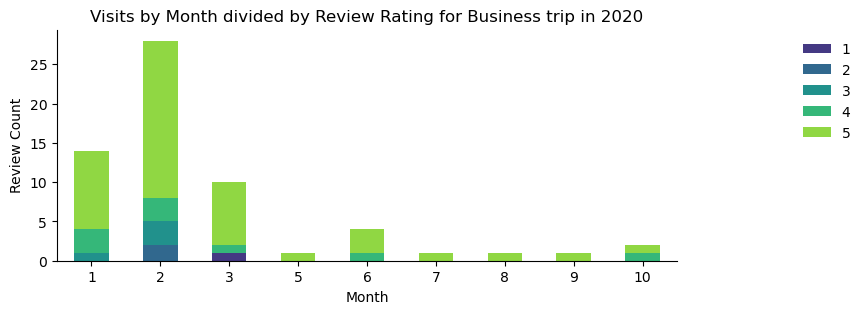

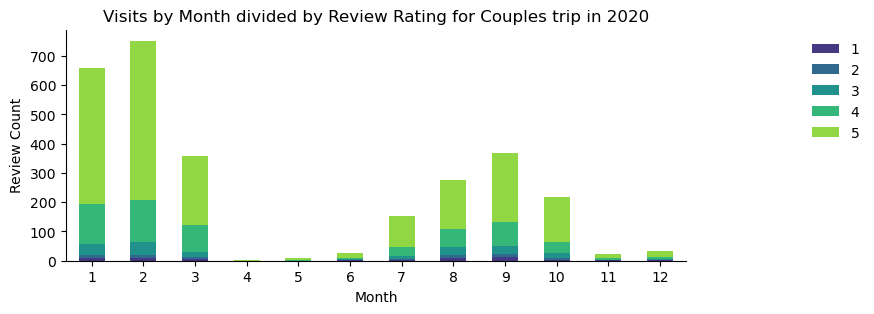

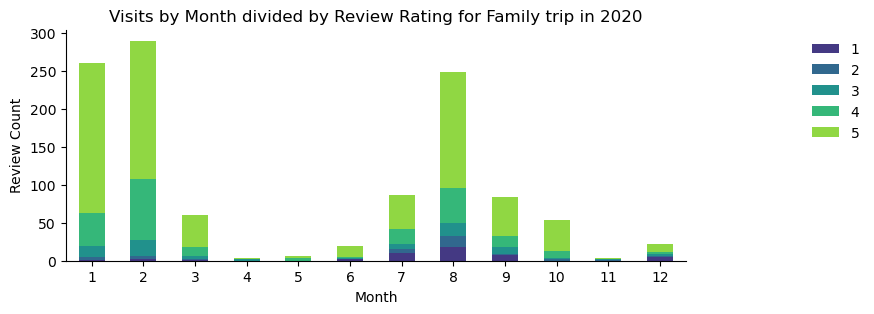

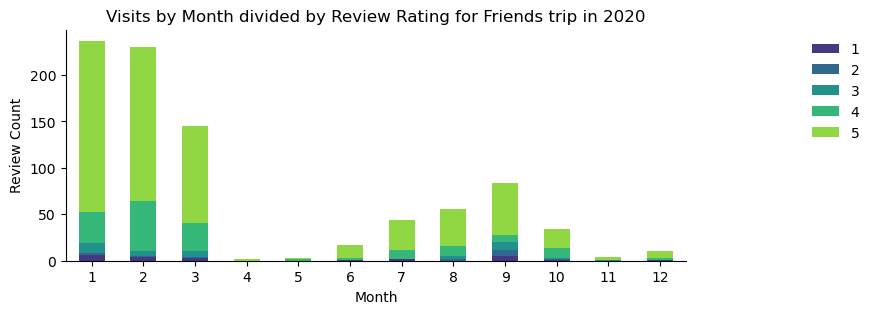

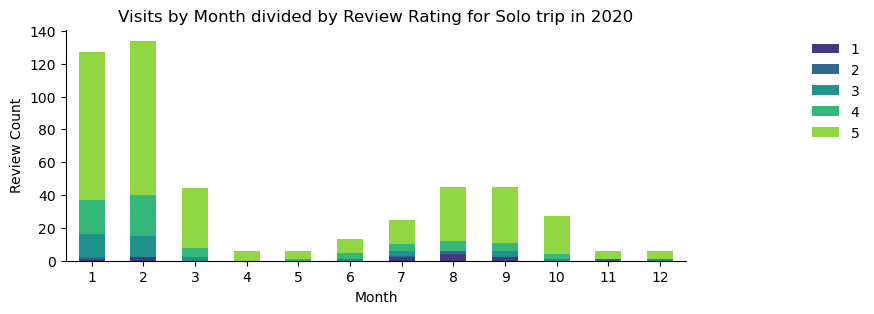

In [42]:
df['reviewVisited'] = pd.to_datetime(df['reviewVisited'])
df_2020 = df[df['reviewVisited'].dt.year == 2020]

# bar plot for each trip type
for trip_type, trip_type_data in df_2020.groupby('tripType'):
    tempDF = trip_type_data.groupby([trip_type_data['reviewVisited'].dt.month.rename('Month'), 'reviewRating']).size().unstack(fill_value=0)

    fig, ax = plt.subplots(figsize=(8, 3))
    custom_palette = sns.color_palette("viridis", n_colors=len(tempDF.columns))
    g = tempDF.plot(kind='bar', stacked=True, ax=ax, color=custom_palette)
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    sns.despine()
    plt.title(f"Visits by Month divided by Review Rating for {trip_type} trip in 2020")
    plt.xlabel("Month")
    plt.ylabel("Review Count")
    plt.xticks(rotation=0, ha='center')
    plt.rc('axes')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc='upper center', 
              ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)
    ax.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.3, 1), frameon=False)
    plt.show()

Again, a noticeble effect of the pandemic can be seen in where.

## 1.3. Exploratory Data Analysis: Sheet Attractions

### Summary Statistics: Univariate EDA

In [43]:
Attractions.head()

,ID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ


In [44]:
Attractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       100 non-null    object
 1   Name     100 non-null    object
 2   Country  100 non-null    object
 3   ISO      100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [45]:
Attractions.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq
ID,100,100,MAG001,1
Name,100,99,Old Town,2
Country,100,26,Spain,17
ISO,100,25,ES,17


In [46]:
Attractions.drop_duplicates(subset=['Country','ISO'])[['Country','ISO']].sort_values(by='Country')

,Country,ISO
6,Austria,AT
12,Belgium,BE
59,Bulgaria,BG
30,Croatia,HR
82,Curaçao,NL
75,Cyprus,CY
4,Czech Republic,CZ
2,England,UK
39,Estonia,EE
69,Finland,FI


- Scot (line 62) need to be corrected to Scotland
- Line 44 - Poland - HR - wrong ISO code 
- Curaçao is not in Europe
- Line 77 - Italy - VA; it's best to consider Vatican City with Italy ISO code.

### Summary Statistics: Bivariate EDA

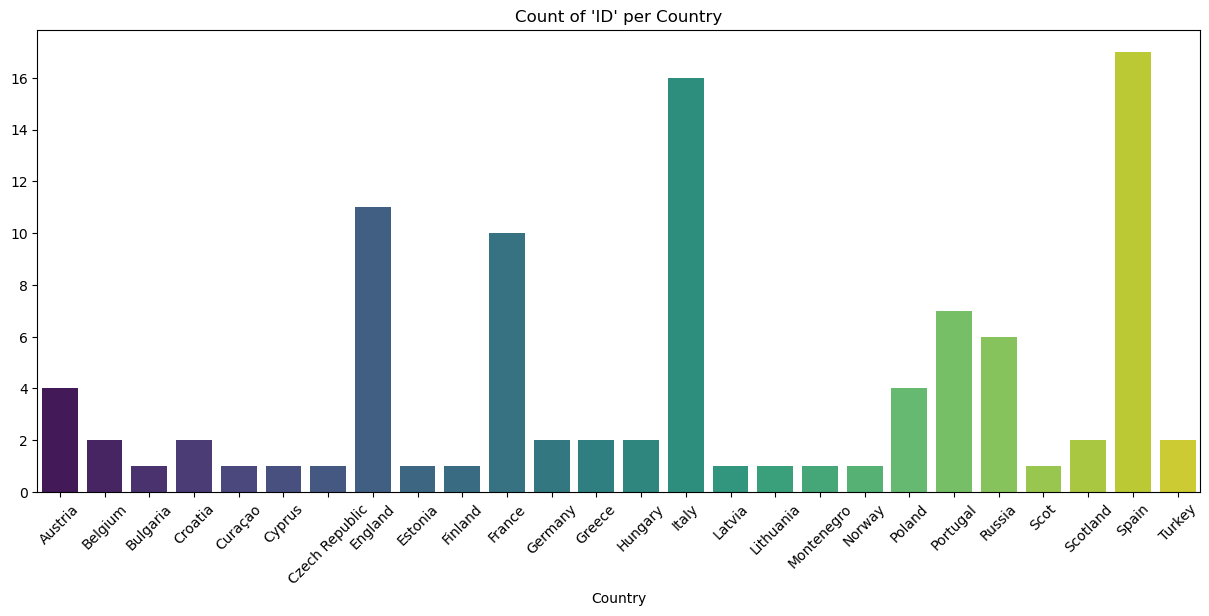

In [47]:
count_by_country = Attractions.groupby('Country')['ID'].count()

plt.figure(figsize=(15, 6))
sns.barplot(x=count_by_country.index, y=count_by_country.values, palette='viridis')
plt.title("Count of 'ID' per Country")
plt.xlabel("Country")
plt.xticks(rotation=45) 
plt.show()

Spain, Italy, France, and the England prominently emerge as the countries with the highest number of attractions featured in the top rankings. 

### Summary Statistics: Multivariate EDA
#### Redundancy: Duplicate rows

In [48]:
Attractions[Attractions.duplicated(subset='ID', keep=False)]

,ID,Name,Country,ISO


In [49]:
Attractions[Attractions.duplicated(subset='Name', keep=False)]

,ID,Name,Country,ISO
30,MAG031,Old Town,Croatia,HR
44,MAG045,Old Town,Poland,HR


2 attracttions with the same name but they are in different countries so they need different Ids.

**Quality Assessment: Summary Statistics for ## Europe-Top100Attractions_ENG_20190101_20210821 Source**

1. **Missing Values:** Four columns have missing values: `userName`, `userLocation`, `tripType`, and `reviewVisited`. Addressing this issue will be a priority during the Data Preparation section.

2. **Outliers:** The dataset exhibits outliers in terms of `usercontributions` and `totalReviews`, with a significantly deviating from the mean. This will require further investigation.

3. **Duplicate Rows:** There are 7,012 potential duplicate rows (excluding `extractionDate`). These entries will undergo further analysis to determine their nature and relevance.

4. **`userLocation`** column is a good column to explore but since the data format is not normalize (has various types like NY, New York or United States...), we need to normalize this column to analyze potencial patterns.

5. `LocalID` values with 'u' and 'genis' need to be replaced.

6. Small ajdustments in `Attractions sheet` - normalizing and correcting names. Exclude Curação.

# 2. Holidays Source
## 2.1. Data importation

In [50]:
holidays = pd.read_csv('Holidays.csv', delimiter=';')
holidays.set_index('Unnamed: 0', inplace=True)
holidays

,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
Unnamed: 0,,,,,,
0,Argentina,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day],NaN,AR,1970-01-01
1,Australia,New Year's Day,New Year's Day,NaN,AU,1970-01-01
2,Austria,Neujahr,Neujahr,NaN,AT,1970-01-01
3,Belgium,Nieuwjaarsdag,Nieuwjaarsdag,NaN,BE,1970-01-01
4,Brazil,Ano novo,Ano novo,NaN,BR,1970-01-01
...,...,...,...,...,...,...
69552,Sweden,Annandag jul,Annandag jul,NaN,SE,2098-12-26
69553,United Kingdom,Boxing Day,Boxing Day,True,GB,2098-12-26
69554,Wales,Boxing Day,Boxing Day,NaN,NaN,2098-12-26


Seems that `normalizeHolidayName` is not normalize

## 2.2. Exploratory Data Analysis
### Summary Statistics: Univariate EDA

In [51]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69557 entries, 0 to 69556
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   countryOrRegion       69557 non-null  object
 1   holidayName           69557 non-null  object
 2   normalizeHolidayName  69557 non-null  object
 3   isPaidTimeOff         3934 non-null   object
 4   countryRegionCode     64559 non-null  object
 5   date                  69557 non-null  object
dtypes: object(6)
memory usage: 3.7+ MB


In [52]:
holidays.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq
countryOrRegion,69557,38,Sweden,8394
holidayName,69557,483,Søndag,6386
normalizeHolidayName,69557,438,Søndag,6386
isPaidTimeOff,3934,2,True,2695
countryRegionCode,64559,34,SE,8394
date,69557,20665,2001-01-01,37


In [53]:
holidays['date'] = pd.to_datetime(holidays['date'])

print(holidays['date'].max())
print(holidays['date'].min())

2098-12-28 00:00:00
1970-01-01 00:00:00


We can adapt this range to our scope range 

In [54]:
# Identify unique 'countryOrRegion' values where 'countryRegionCode' is NaN
nan_values = holidays.loc[holidays['countryRegionCode'].isna(), 'countryOrRegion'].unique()
print(nan_values)

['Scotland' 'Northern Ireland' 'England' 'Wales']


- We need to complete these missing values with the GB ISO code

### Summary Statistics: Multivariate EDA
#### Redundancy: Duplicate rows

In [55]:
holidays.duplicated(subset=['countryOrRegion', 'holidayName', 'normalizeHolidayName', 'isPaidTimeOff', 'countryRegionCode', 'date'], keep=False).sum()

0